# Home Price Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [4]:
df.to_csv('homeprice.csv',index=False)

In [7]:
df=pd.read_csv("homeprice.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


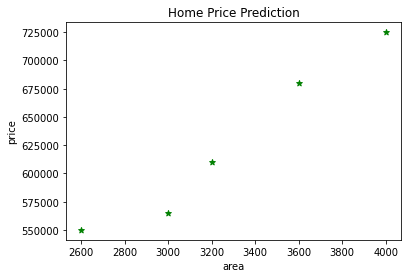

In [8]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.title('Home Price Prediction')
plt.scatter(df.area,df.price,color='green',marker='*')

In [10]:
new_df=df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [11]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [12]:
reg=linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [14]:
reg.predict([[3300]])

C:\Users\Jyoti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [15]:
reg.coef_

array([135.78767123])

In [18]:
reg.intercept_


180616.43835616432

# Y=m*X+b

In [19]:
3300*135.78767123+180616.43835616432

628715.7534151643

# (1) Predict price of a home with area = 5000 sqr ft

In [20]:
reg.predict([[5000]])

C:\Users\Jyoti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

# Generate CSV file with list of home price predictions


In [23]:
import csv
fields=['areas']


In [31]:
rows=[[1000],[1500],[2300],[3540],[4120],[4560],[5490],[3460],[4750],
      [2300],[9000],[8600],[7100]]

In [32]:
filename="area.csv"


In [33]:
with open(filename,'w') as areafile:
    csvwriter = csv.writer(areafile)
    csvwriter.writerow(fields)
    csvwriter.writerows(rows)
    

In [34]:
area_df = pd.read_csv("area.csv")
area_df.head(5)

,area1
0,1000
1,1500
2,2300
3,3540
4,4120


In [35]:
pre=reg.predict(area_df)

C:\Users\Jyoti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area1
Feature names seen at fit time, yet now missing:
- area

  warnings.warn(message, FutureWarning)


In [36]:
area_df['prices'] = pre
area_df

,area1,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [37]:
area_df.to_csv("prediction.csv")